In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../data/cleaned_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               302 non-null    object 
 1   price               302 non-null    float64
 2   brand               302 non-null    object 
 3   resolution          302 non-null    object 
 4   screen_size         302 non-null    float64
 5   level_1_model       302 non-null    object 
 6   processor           302 non-null    object 
 7   processor_speed     302 non-null    float64
 8   ram                 302 non-null    float64
 9   warranty            302 non-null    int64  
 10  link                302 non-null    object 
 11  description         199 non-null    object 
 12  weight              161 non-null    float64
 13  hdd_gb              64 non-null     float64
 14  ssd_gb              230 non-null    float64
 15  graphic_card        176 non-null    object 
 16  hdd_exis

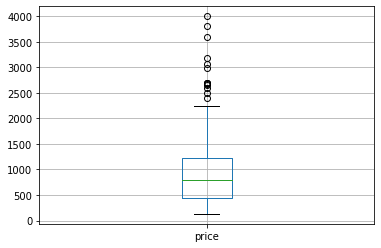

In [4]:
# boxplot = data.boxplot(column=['price', 'screen_size', 'processor_speed','ram','weight', 'storage'])
# boxplot = data.boxplot()
boxplot_price = data.boxplot(column=["price"])
#gak tau kenapa price bisa tinggi banget. secara merek dan component, tidak terlihat beda. 
#mungkin karena laptopnya lebih baru, atau baru dipake sebentar --> we cannot track this
#consider to delete the outliers since the number of outliers is only 14 (4.6%)

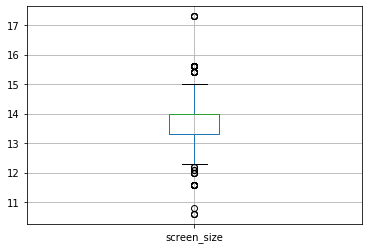

In [5]:
boxplot_screensize = data.boxplot(column=['screen_size']) 
#laptop with higher prices (outliers) tend to have screen _size >15
#we can consider to remove outliers from price that have screen _size >15

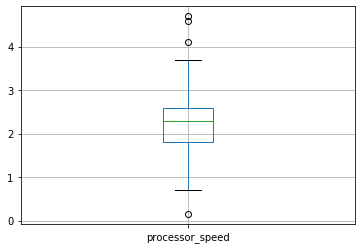

In [6]:
boxplot_processorspeed = data.boxplot(column=['processor_speed']) #no need to remove, gak ngaruh

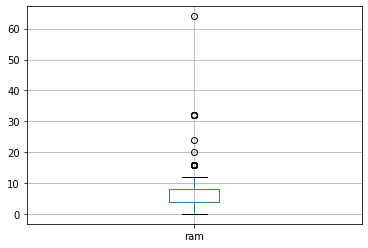

In [7]:
boxplot_ram = data.boxplot(column=['ram'])
#laptop with higher prices (outliers) tend to have ram>16
#we can consider to remove outliers from price that have ram>=16?
#if we remove all outliers with ram >10, we will loose 70 data (23%)

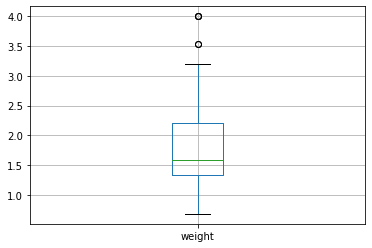

In [8]:
boxplot_weight = data.boxplot(column=['weight']) #no need to remove

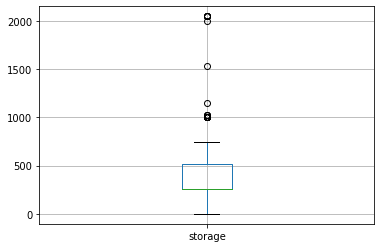

In [9]:
boxplot_storage = data.boxplot(column=['storage'])
#22 outliers
#some price outliers have storage >=1000, we can remove those

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

brand                  0
description            0
graphic_card           0
graphic_card_exist     0
hdd_exist             64
hdd_gb                 7
level_1_model          0
link                   0
price                 14
processor              0
processor_speed        4
ram                   70
resolution             0
screen_size           79
ssd_exist             72
ssd_gb                18
storage               22
title                  0
warranty              61
weight                 5
dtype: int64

In [11]:
70/302

0.23178807947019867